# Metadata preprocessing

Run this script to preprocess the datasets and to create a metadata file, once you have downloaded them into the `data/EmoData` folder.

### EmoDB

In [6]:
import os
import pandas as pd

In [ ]:
data_dir = "data"
emo_data_dir = os.path.join(data_dir, "EmoData")
EmoDB_dir = os.path.join(emo_data_dir, "EmoDB")
wav_dir = os.path.join(EmoDB_dir, "wav")
metadata_filepath = os.path.join(data_dir, "metadata_emo", "metadata_emo_EmoDB.csv")

EmoDict_german = {
    'W': 'anger',
    'L': 'boredom',
    'A': 'fear',
    'F': 'joy',
    'T': 'sadness',
    'E': 'disgust',
    'N': 'neutral',
}

# comment the following line if the metadata file already exists
metadata_new = pd.DataFrame({'filepath': [],
                            'speaker': [],
                            'gender': [],
                            'emotion': [],
                            'utterance_id': []})

for file in os.listdir(wav_dir):
    speaker = file[:2]
    utterance_id = file[2:5]
    emotion_letter = file[5]
    emotion = EmoDict_german[emotion_letter]
    filepath = os.path.join('EmoDB', 'wav', file)

    new_row = pd.DataFrame({'filepath': [filepath],
                            'speaker': [speaker], 
                            'gender': [None],
                            'emotion': [emotion],
                            'utterance_id': [utterance_id]})
    
    metadata_new = pd.concat([metadata_new, new_row])

metadata_new.to_csv(metadata_filepath, index=False)
print('Done')

### eNTERFACE

eNTERFACE dataset is composed of video recordings of actors performing emotional speech. As we are only interested in the audio, we will extract the audio from the video files. The audio files are stored in the `data/EmoData/eNTERFACE/wav` folder. 

In [ ]:
import numpy as np
from moviepy.editor import VideoFileClip
from scipy.io import wavfile

In [ ]:
def extract_audio_array_from_video(avi_path):
    """
    extract mono audio array from single .avi video. sampling rate = 44100 Hz
    
    Parameters
    ----------
    avi_path : path of the video file (.avi)

    Returns
    -------
    mono : mono array of audio track (nb samples,1)
    default sampling rate
    """
    
    video = VideoFileClip(avi_path)
    audio = video.audio
    print(f'audio type: {type(audio)}')
    # Extract the audio as a list of samples
    audio_samples = list(audio.iter_frames())
    # Convert the list of samples to a NumPy array
    sound_array = np.array(audio_samples)
    mono = np.mean(sound_array,axis=1) #convert to mono
    
    return mono

In [ ]:
data_dir = "data"
emo_data_dir = os.path.join(data_dir, "EmoData")
enterface_dir = os.path.join(emo_data_dir, "eNTERFACE", "enterface database")
enterface_wav_dir = os.path.join(emo_data_dir, "eNTERFACE", "wav")

for subject in os.listdir(enterface_dir):
    subject_path = os.path.join(enterface_dir, subject)
    for emotion in os.listdir(subject_path):
        emotion_path = os.path.join(subject_path, emotion)
        for sentence in os.listdir(emotion_path):
            sentence_path = os.path.join(emotion_path, sentence)
            if os.path.isdir(sentence_path):
                for video in os.listdir(sentence_path):
                    video_path = os.path.join(sentence_path, video)
                    if video.endswith('.avi'):
                        # print(f"Processing {video_path}")
                        audio_filename = os.path.splitext(video)[0] + '.wav'
                        audio_path = os.path.join(enterface_wav_dir, subject, emotion, sentence)
                        audio_filepath = os.path.join(audio_path, audio_filename)
                        if not os.path.exists(audio_filepath):
                            audio_array = extract_audio_array_from_video(video_path)
                            os.makedirs(audio_path, exist_ok=True)
                            print(f"Extracting audio from {video} to {audio_filename}")
                            wavfile.write(audio_filepath, 44100, audio_array)
                        else:
                            print(f"Audio file {audio_filepath} already exists. Skipping extraction.")
                            continue

create the metadata file

In [ ]:
data_dir = "data"
emo_data_dir = os.path.join(data_dir, "EmoData")
enterface_wav_dir = os.path.join(emo_data_dir, "eNTERFACE", "wav")
metadata_filepath = os.path.join(data_dir, "metadata_emo", "metadata_emo_eNTERFACE.csv")
metadata_new = pd.read_csv(metadata_filepath)

emotion_dict = {
    'anger': 'anger',
    'happiness': 'joy',
    'fear': 'fear',
    'sadness': 'sadness',
    'disgust': 'disgust',
    'surprise': 'surprise',
    'neutral': 'neutral',
}

# comment the following line if the metadata file already exists
metadata_new = pd.DataFrame({'filepath': [],
                            'speaker': [],
                            'gender': [],
                            'emotion': [],
                            'utterance_id': []})

for subject in os.listdir(enterface_wav_dir):
    subject_path = os.path.join(enterface_wav_dir, subject)
    for emotion in os.listdir(subject_path):
        emotion_path = os.path.join(subject_path, emotion)
        for sentence in os.listdir(emotion_path):
            sentence_path = os.path.join(emotion_path, sentence)
            if os.path.isdir(sentence_path):
                for audio in os.listdir(sentence_path):
                    audio_path = os.path.join(sentence_path, audio)
                    if audio.endswith('.wav'):
                        emotion_label = emotion_dict[emotion]
                        speaker = subject[7:]
                        utterance_id = sentence[8:]
                        filepath = audio_path[13:]
                        new_row = pd.DataFrame({'filepath': [filepath],
                                                'speaker': [speaker], 
                                                'gender': [None],
                                                'emotion': [emotion_label],
                                                'utterance_id': [utterance_id]})
                        metadata_new = pd.concat([metadata_new, new_row])
                        
metadata_new.to_csv(metadata_filepath, index=False)
print('Done')


### CaFE

In [ ]:
data_dir = "data"
emo_data_dir = os.path.join(data_dir, "EmoData")
CaFE_dir = os.path.join(emo_data_dir, "CaFE")
metadata_filepath = os.path.join(data_dir, "metadata_emo", "metadata_emo_CaFE.csv")

EmoDict_CaFE = {
    'Colère': 'anger',
    'Surprise': 'surprise',
    'Peur': 'fear',
    'Joie': 'joy',
    'Tristesse': 'sadness',
    'Dégoût': 'disgust',
    'Neutre': 'neutral',
}

# comment the following line if the metadata file already exists
metadata_new = pd.DataFrame({'filepath': [],
                            'speaker': [],
                            'gender': [],
                            'emotion': [],
                            'utterance_id': [],
                            'intensity': []})

for emotion_dir in os.listdir(CaFE_dir):
    if emotion_dir.endswith('.txt'):
        continue

    elif emotion_dir == 'Neutre':
        emotion_path = os.path.join(CaFE_dir, emotion_dir)
        emotion = EmoDict_CaFE[emotion_dir]
        for file in os.listdir(emotion_path):
            if file.endswith('.wav'):
                filepath = os.path.join('CaFE', emotion_dir, file)
                speaker = file[:2]
                utterance_id = file[-5]
                gender = 'male' if int(speaker) % 2 == 1 else 'female'
                intensity = None
                new_row = pd.DataFrame({'filepath': [filepath],
                                        'speaker': [speaker],
                                        'gender': [gender],
                                        'emotion': [emotion],
                                        'utterance_id': [utterance_id],
                                        'intensity': [intensity]})
                metadata_new = pd.concat([metadata_new, new_row])
    else:
        emotion_path = os.path.join(CaFE_dir, emotion_dir)
        emotion = EmoDict_CaFE[emotion_dir]
        for intensity_dir in os.listdir(emotion_path):
            intensity_path = os.path.join(emotion_path, intensity_dir)
            intensity = intensity_dir
            if intensity == 'Faible':
                intensity = 'low'
            elif intensity == 'Fort':
                intensity = 'high'
            for file in os.listdir(intensity_path):
                if file.endswith('.wav'):
                    filepath = os.path.join('CaFE', emotion_dir, intensity_dir, file)
                    speaker = file[:2]
                    utterance_id = file[-5]
                    gender = 'male' if int(speaker) % 2 == 1 else 'female'
                    new_row = pd.DataFrame({'filepath': [filepath],
                                            'speaker': [speaker],
                                            'gender': [gender],
                                            'emotion': [emotion],
                                            'utterance_id': [utterance_id],
                                            'intensity': [intensity]})
                    metadata_new = pd.concat([metadata_new, new_row])

metadata_new.to_csv(metadata_filepath, index=False)
print('Done')

Done


### RAVDESS

In [7]:
data_dir = "data"
emo_data_dir = os.path.join(data_dir, "EmoData")
RAVDESS_dir = os.path.join(emo_data_dir, "RAVDESS")
metadata_filepath = os.path.join(data_dir, "metadata_emo", "metadata_emo_RAVDESS.csv")

EmoDict_RAVDESS = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'joy',
    '04': 'sadness',
    '05': 'anger',
    '06': 'fear',
    '07': 'disgust',
    '08': 'surprise',
}

# comment the following line if the metadata file already exists
metadata_new = pd.DataFrame({'filepath': [],
                            'speaker': [],
                            'gender': [],
                            'emotion': [],
                            'utterance_id': [],
                            'intensity': []})

for speaker in os.listdir(RAVDESS_dir):
    speaker_path = os.path.join(RAVDESS_dir, speaker)
    for file in os.listdir(speaker_path):
        if file.endswith('.wav'):
            filepath = os.path.join('RAVDESS', speaker, file)
            file_info = file.split('-')
            emotion_int = file_info[2]
            emotion = EmoDict_RAVDESS[emotion_int]
            intensity = file_info[3]
            if intensity == '01':
                intensity = 'low'
            elif intensity == '02':
                intensity = 'high'
            utterance_id = file_info[4]
            speaker_id = file_info[6][:-4]
            gender = "male" if int(speaker_id) % 2 == 1 else "female"
            new_row = pd.DataFrame({'filepath': [filepath],
                                    'speaker': [speaker_id],
                                    'gender': [gender],
                                    'emotion': [emotion],
                                    'utterance_id': [utterance_id],
                                    'intensity': [intensity]})
            metadata_new = pd.concat([metadata_new, new_row])

metadata_new.to_csv(metadata_filepath, index=False)
print('Done')

Done


# Create split files

Run this script to create the split files (train, val, test) for training and testing the models. The split files are created under the LOSGO (Leave One Speaker Group Out) or LOSO (Leave One Speaker Out) procedure.

### EmoDB

In [14]:
emodb_metadata_filepath = os.path.join('data', "metadata_emo", 'metadata_emo_EmoDB.csv')
emodb_metadata = pd.read_csv(emodb_metadata_filepath)

# Select the speakers for test and validation sets
test_speakers = [15, 16]
validation_speakers = [13, 14]

# create csv files for test and validation speakers metadata
test_metadata = pd.DataFrame(columns=emodb_metadata.columns)
validation_metadata = pd.DataFrame(columns=emodb_metadata.columns)
train_metadata = pd.DataFrame(columns=emodb_metadata.columns)

for index, row in emodb_metadata.iterrows():
    speaker = row['speaker']
    row = row.to_frame().T
    if int(speaker) in test_speakers:
        test_metadata = pd.concat([test_metadata, row])
    elif int(speaker) in validation_speakers:

        validation_metadata = pd.concat([validation_metadata, row], ignore_index=True)
    else:
        train_metadata = pd.concat([train_metadata, row], ignore_index=True)

# shuffle the metadata files
train_metadata = train_metadata.sample(frac=1).reset_index(drop=True)
validation_metadata = validation_metadata.sample(frac=1).reset_index(drop=True)
test_metadata = test_metadata.sample(frac=1).reset_index(drop=True)

# save the metadata files
train_metadata.to_csv(os.path.join('data','metadata_emo', 'train_metadata_emo_emodb.csv'), index=False)
validation_metadata.to_csv(os.path.join('data','metadata_emo', 'val_metadata_emo_emodb.csv'), index=False)
test_metadata.to_csv(os.path.join('data','metadata_emo', 'test_metadata_emo_emodb.csv'), index=False)
print('Metadata files created successfully')


Metadata files created successfully


### eNTERFACE

In [ ]:
enterface_metadata_filepath = os.path.join('data', 'metadata_emo', 'metadata_emo_eNTERFACE.csv')
enterface_metadata = pd.read_csv(enterface_metadata_filepath)

test_speakers = [36, 37, 38, 39]
validation_speakers = [40, 41, 42, 43, 44]

# create csv files for test and validation speakers metadata
test_metadata = pd.DataFrame(columns=enterface_metadata.columns)
validation_metadata = pd.DataFrame(columns=enterface_metadata.columns)
train_metadata = pd.DataFrame(columns=enterface_metadata.columns)

for index, row in enterface_metadata.iterrows():
    speaker = row['speaker']
    row = row.to_frame().T
    if int(speaker) in test_speakers:
        test_metadata = pd.concat([test_metadata, row])
    elif int(speaker) in validation_speakers:

        validation_metadata = pd.concat([validation_metadata, row], ignore_index=True)
    else:
        train_metadata = pd.concat([train_metadata, row], ignore_index=True)

# shuffle the metadata files
train_metadata = train_metadata.sample(frac=1).reset_index(drop=True)
validation_metadata = validation_metadata.sample(frac=1).reset_index(drop=True)
test_metadata = test_metadata.sample(frac=1).reset_index(drop=True)

# save the metadata files
train_metadata.to_csv(os.path.join('data','metadata_emo', 'train_metadata_emo_enterface.csv'), index=False)
validation_metadata.to_csv(os.path.join('data','metadata_emo', 'val_metadata_emo_enterface.csv'), index=False)
test_metadata.to_csv(os.path.join('data','metadata_emo', 'test_metadata_emo_enterface.csv'), index=False)
print('Metadata files created successfully')


### CaFE

In [74]:
cafe_metadata_filepath = os.path.join('data', "metadata_emo", 'metadata_emo_CaFE.csv')
cafe_metadata = pd.read_csv(cafe_metadata_filepath)

# Select the speakers for test and validation sets
test_speakers = [11,12]
validation_speakers = [9, 10]

# create csv files for test and validation speakers metadata
test_metadata = pd.DataFrame(columns=cafe_metadata.columns)
validation_metadata = pd.DataFrame(columns=cafe_metadata.columns)
train_metadata = pd.DataFrame(columns=cafe_metadata.columns)

for index, row in cafe_metadata.iterrows():
    speaker = row['speaker']
    row = row.to_frame().T
    if int(speaker) in test_speakers:
        test_metadata = pd.concat([test_metadata, row])
    elif int(speaker) in validation_speakers:

        validation_metadata = pd.concat([validation_metadata, row], ignore_index=True)
    else:
        train_metadata = pd.concat([train_metadata, row], ignore_index=True)

# shuffle the metadata files
train_metadata = train_metadata.sample(frac=1).reset_index(drop=True)
validation_metadata = validation_metadata.sample(frac=1).reset_index(drop=True)
test_metadata = test_metadata.sample(frac=1).reset_index(drop=True)

# save the metadata files
train_metadata.to_csv(os.path.join('data', 'metadata_emo', 'train_metadata_emo_cafe.csv'), index=False)
validation_metadata.to_csv(os.path.join('data','metadata_emo', 'val_metadata_emo_cafe.csv'), index=False)
test_metadata.to_csv(os.path.join('data','metadata_emo', 'test_metadata_emo_cafe.csv'), index=False)
print('Metadata files created successfully')


Metadata files created successfully


### RAVDESS

In [8]:
ravdess_metadata_filepath = os.path.join('data', "metadata_emo", 'metadata_emo_RAVDESS.csv')
ravdess_metadata = pd.read_csv(ravdess_metadata_filepath)

# Select the speakers for test and validation sets
test_speakers = [24, 23, 22, 21]
validation_speakers = [20, 19, 18, 17]

# create csv files for test and validation speakers metadata
test_metadata = pd.DataFrame(columns=ravdess_metadata.columns)
validation_metadata = pd.DataFrame(columns=ravdess_metadata.columns)
train_metadata = pd.DataFrame(columns=ravdess_metadata.columns)

for index, row in ravdess_metadata.iterrows():
    speaker = row['speaker']
    row = row.to_frame().T
    if int(speaker) in test_speakers:
        test_metadata = pd.concat([test_metadata, row])
    elif int(speaker) in validation_speakers:

        validation_metadata = pd.concat([validation_metadata, row], ignore_index=True)
    else:
        train_metadata = pd.concat([train_metadata, row], ignore_index=True)

# shuffle the metadata files
train_metadata = train_metadata.sample(frac=1).reset_index(drop=True)
validation_metadata = validation_metadata.sample(frac=1).reset_index(drop=True)
test_metadata = test_metadata.sample(frac=1).reset_index(drop=True)

# save the metadata files
train_metadata.to_csv(os.path.join('data', 'metadata_emo', 'train_metadata_emo_ravdess.csv'), index=False)
validation_metadata.to_csv(os.path.join('data','metadata_emo', 'val_metadata_emo_ravdess.csv'), index=False)
test_metadata.to_csv(os.path.join('data','metadata_emo', 'test_metadata_emo_ravdess.csv'), index=False)
print('Metadata files created successfully')


Metadata files created successfully


# Preprocess the wav files

Run this script to preprocess the wav files. The preprocessing includes:
- Resampling the audio files to 16kHz
- Removing silence from the audio files

In [53]:
import pandas as pd
import os
import torch
import torchaudio
import torchaudio.transforms as T
import silero_vad
from IPython.display import Audio
import matplotlib.pyplot as plt
from tqdm import tqdm

In [45]:
def cut_data(waveform, model):

    speech_timestamps = silero_vad.get_speech_timestamps(
                        waveform,
                        model,
                        threshold=0.4,
                        return_seconds = False,
                        sampling_rate = 16000,
                        min_silence_duration_ms = 100
                        )
    
    if len(speech_timestamps) != 0:
        start_sample = int(speech_timestamps[0]["start"])
        end_sample = int(speech_timestamps[-1]["end"]) + 6000
    else:
        return waveform

    if end_sample >= waveform.shape[1]:
        end_sample = waveform.shape[1]
    if start_sample >= waveform.shape[1]:
        start_sample = 0

    waveform = waveform[:, start_sample:end_sample]

    return waveform

speech_timestamps: [{'start': 10784, 'end': 36320}]


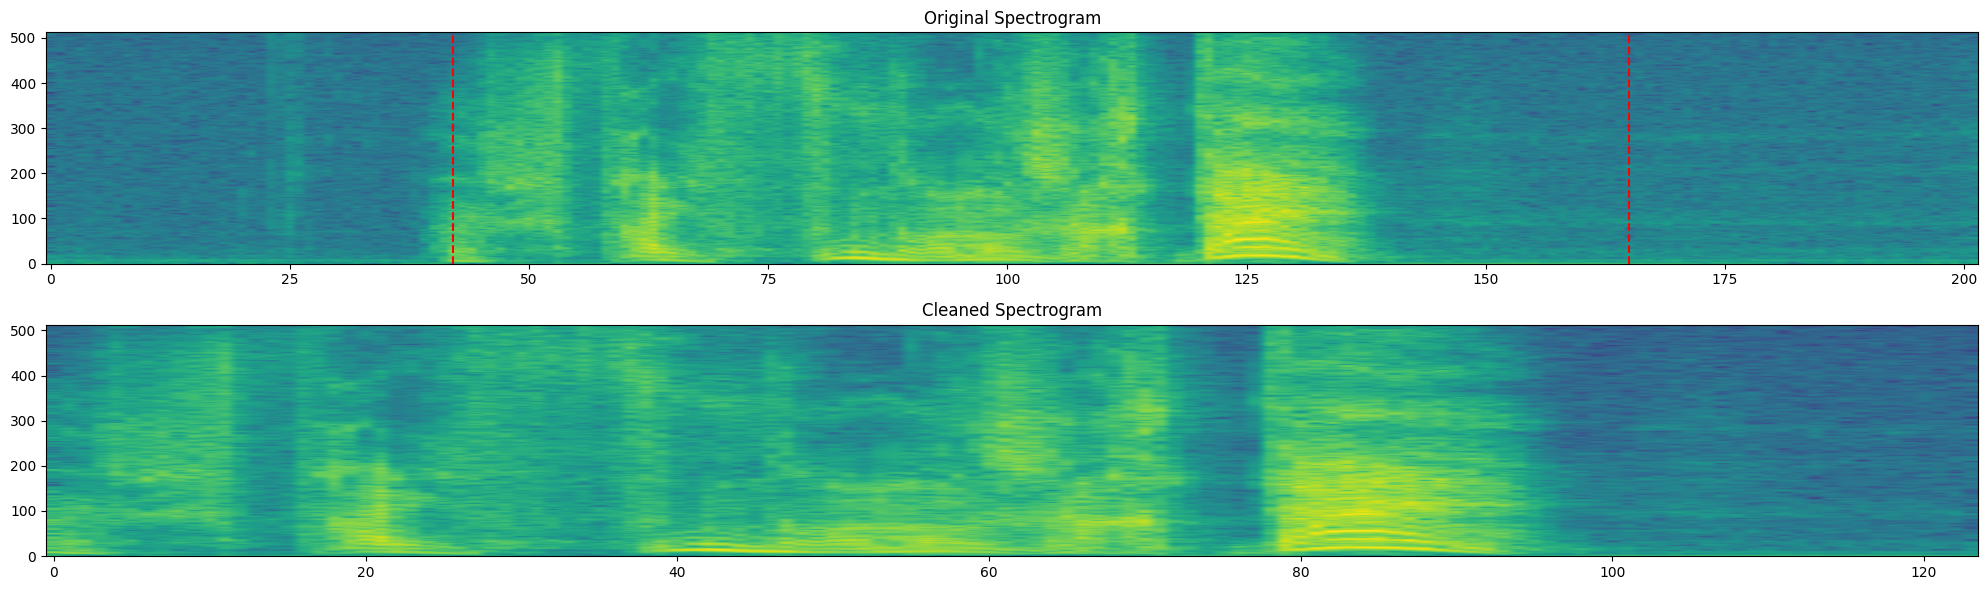

Original waveform duration: 3.22775 seconds
Cut waveform duration: 1.971 seconds


In [44]:
# Test the function to verify if the speech timestamps are correct (you might tune the threshold if not)
audio_path = os.path.join('data', 'EmoData', 'CaFE', 'Colère', 'Faible', '01-C-1-1.wav')
model = silero_vad.load_silero_vad()

waveform, sample_rate = torchaudio.load(audio_path)
resampler = T.Resample(orig_freq=sample_rate, new_freq=16000)
if waveform.shape[0] == 2:
    waveform = torch.mean(waveform, dim=0, keepdim=True)
waveform = resampler(waveform)

speech_timestamps = silero_vad.get_speech_timestamps(
                    waveform,
                    model,
                    threshold=0.4,
                    return_seconds = False,
                    sampling_rate = 16000,
                    min_silence_duration_ms = 100
                    )
print(f'speech_timestamps: {speech_timestamps}')

start_sample = int(speech_timestamps[0]["start"])
end_sample = int(speech_timestamps[-1]["end"]) + 6000

waveform_cut = waveform[:, start_sample:end_sample]

spectrogram = T.Spectrogram(n_fft=1024, win_length=512, hop_length=256)(waveform)
spectrogram_cut = T.Spectrogram(n_fft=1024, win_length=512, hop_length=256)(waveform_cut)

# plot the spectrogram
fig, axs = plt.subplots(2, 1, figsize=(20, 6))
axs[0].imshow(10 * spectrogram[0].log2().numpy(), cmap='viridis', aspect='auto', origin='lower')
axs[0].axvline(x=start_sample//256, color='r', linestyle='--')
axs[0].axvline(x=end_sample//256, color='r', linestyle='--')
axs[0].set_title('Original Spectrogram')
axs[1].imshow(10 * spectrogram_cut[0].log2().numpy(), cmap='viridis', aspect='auto', origin='lower')
axs[1].set_title('Cleaned Spectrogram')
plt.tight_layout()
plt.show()

# Listen to the audio
print(f'Original waveform duration: {waveform.shape[1] / 16000} seconds')
print(f'Cut waveform duration: {waveform_cut.shape[1] / 16000} seconds')
Audio(waveform_cut.numpy(), rate=16000)

In [ ]:
def preprocess_wav_files(metadata_filepath,initial_sample_rate):

    metadata = pd.read_csv(metadata_filepath)
    resampler = T.Resample(orig_freq=initial_sample_rate, new_freq=16000)
    model = silero_vad.load_silero_vad()

    for index, row in tqdm(metadata.iterrows(), total=metadata.shape[0], desc="Processing files"):
        filepath = row['filepath']
        filepath = os.path.join('data', 'EmoData', filepath)

        if os.path.exists(filepath):  

            # Load the audio file
            waveform, sample_rate = torchaudio.load(filepath)
            # Resample the audio to 16kHz
            waveform = resampler(waveform)
            # Make the waveform mono
            if waveform.shape[0] == 2:
                waveform = torch.mean(waveform, dim=0, keepdim=True)
            # Clean the audio data
            waveform = cut_data(waveform, model)
            # Save the cleaned audio file
            torchaudio.save(filepath, waveform, 16000)
        else:
            print(f"File {filepath} does not exist. Skipping.")
            continue
    print("Preprocessing completed.")

    return

In [54]:
metadata_filepath = os.path.join('data', 'metadata_emo', 'metadata_emo_CaFE.csv')
preprocess_wav_files(metadata_filepath, initial_sample_rate=48000)

Processing files:   0%|          | 0/936 [00:00<?, ?it/s]

Processing files: 100%|██████████| 936/936 [00:57<00:00, 16.17it/s]

Preprocessing completed.


In [62]:
metadata_filepath = os.path.join('data', 'metadata_emo', 'metadata_emo_RAVDESS.csv')
preprocess_wav_files(metadata_filepath, initial_sample_rate=48000)

Processing files: 100%|██████████| 1440/1440 [01:13<00:00, 19.48it/s]

Preprocessing completed.


In [68]:
metadata_filepath = os.path.join('data', 'metadata_emo', 'metadata_emo_Oreau.csv')
preprocess_wav_files(metadata_filepath, initial_sample_rate=44100)


Processing files: 100%|██████████| 434/434 [00:18<00:00, 24.03it/s]

Preprocessing completed.


In [69]:
metadata_filepath = os.path.join('data', 'metadata_emo', 'metadata_emo_eNTERFACE.csv')
preprocess_wav_files(metadata_filepath, initial_sample_rate=44100)

Processing files: 100%|██████████| 1293/1293 [00:53<00:00, 24.27it/s]

Preprocessing completed.


In [71]:
metadata_filepath = os.path.join('data', 'metadata_emo', 'metadata_emo_EmoDB.csv')
preprocess_wav_files(metadata_filepath, initial_sample_rate=16000)

Processing files: 100%|██████████| 535/535 [00:19<00:00, 26.90it/s]

Preprocessing completed.


# Merge french metadata files

In [5]:
import os
import pandas as pd

phase = 'val'  # or 'train', 'test'
metadata_cafe_filepath = os.path.join('data', 'metadata_emo', f'{phase}_metadata_emo_cafe.csv')
metadata_oreau_filepath = os.path.join('data', 'metadata_emo', f'{phase}_metadata_emo_oreau.csv')
metadata_french_filepath = os.path.join('data', 'metadata_emo', f'{phase}_metadata_emo_french.csv')

metadata_french = pd.read_csv(metadata_cafe_filepath)
metadata_oreau = pd.read_csv(metadata_oreau_filepath)

for index, row in metadata_oreau.iterrows():
    filepath = row['filepath']
    speaker = row['speaker']
    gender = row['gender']
    emotion = row['emotion']
    utterance_id = row['utterance_id']
    intensity = None
    new_row = pd.DataFrame({'filepath': [filepath],
                            'speaker': [speaker],
                            'gender': [gender],
                            'emotion': [emotion],
                            'utterance_id': [utterance_id],
                            'intensity': [intensity]})
    metadata_french = pd.concat([metadata_french, new_row], ignore_index=True)

# shuffle the metadata file
metadata_french = metadata_french.sample(frac=1).reset_index(drop=True)

# save csv file
metadata_french.to_csv(metadata_french_filepath, index=False)

print('Metadata file created successfully')

Metadata file created successfully
